In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
df = pd.read_csv('framingham_heart_disease.csv')

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
df.shape

(4238, 16)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [9]:
df.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
df['heartRate'].mean()

75.87892376681614

In [12]:
df['education'].max()

4.0

In [13]:
df['cigsPerDay'].mean()

9.003088619624615

In [14]:
df['BPMeds'].max()

1.0

In [15]:
df['totChol'].mean()

236.72158548233045

In [16]:
df['BMI'].mean()

25.80200758473571

In [17]:
df['glucose'].mean()

81.96675324675324

In [18]:
df['education'].fillna(df['education'].max(),inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].max(),inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)
df['glucose'].fillna(df['glucose'].mean(),inplace=True)

In [19]:
df.isnull().sum().max()

0

In [20]:
X = df.iloc[:,:15].values
X

array([[  1.        ,  39.        ,   4.        , ...,  26.97      ,
         80.        ,  77.        ],
       [  0.        ,  46.        ,   2.        , ...,  28.73      ,
         95.        ,  76.        ],
       [  1.        ,  48.        ,   1.        , ...,  25.34      ,
         75.        ,  70.        ],
       ...,
       [  0.        ,  48.        ,   2.        , ...,  22.        ,
         84.        ,  86.        ],
       [  0.        ,  44.        ,   1.        , ...,  19.16      ,
         86.        ,  81.96675325],
       [  0.        ,  52.        ,   2.        , ...,  21.47      ,
         80.        , 107.        ]])

In [21]:
y = df.iloc[:,15].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [23]:
y_test.shape

(848,)

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

#### Best value for K

In [25]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76061321, 0.82783019, 0.81485849, 0.83608491, 0.82311321,
       0.84080189, 0.83490566, 0.84316038, 0.84080189, 0.84433962,
       0.84669811, 0.84551887, 0.84669811, 0.84669811, 0.84787736,
       0.84433962, 0.84551887, 0.84433962, 0.84433962, 0.84433962,
       0.84433962, 0.84433962, 0.84316038, 0.84551887, 0.84433962,
       0.84551887, 0.84551887, 0.84551887, 0.84551887, 0.84433962,
       0.84316038, 0.84433962, 0.84316038, 0.84433962, 0.84316038,
       0.84433962, 0.84316038, 0.84316038, 0.84316038, 0.84551887,
       0.84433962, 0.84551887, 0.84669811, 0.84551887, 0.84551887,
       0.84551887, 0.84551887, 0.84551887, 0.84551887])

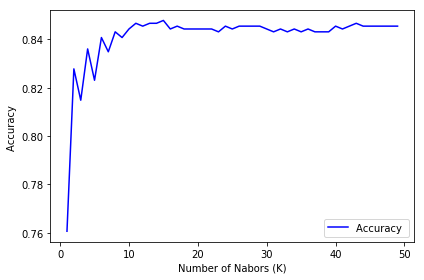

In [49]:
plt.plot(range(1,Ks),mean_acc,'b')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.847877358490566 with k= 15


### After Finding the best value of K, we train the model with that K

In [117]:
k = 15
ModelKNN = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
Pred_KNN = ModelKNN.predict(x_test)

In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

print("Avg F1-score: %.4f" % f1_score(y_test, Pred_KNN, average='weighted', labels=np.unique(Pred_KNN)))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, Pred_KNN))

Avg F1-score: 0.7846
Jaccard score: 0.8479


### SVM

In [103]:
from sklearn.svm import SVC

In [116]:
ModelSVM = SVC(kernel='rbf',gamma='auto').fit(x_train, y_train)
Pred_SVM = ModelSVM.predict(x_test) 

print("Avg F1-score: %.4f" % f1_score(y_test, Pred_SVM, average='weighted', labels=np.unique(Pred_SVM)))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, Pred_SVM))

Avg F1-score: 0.9163
Jaccard score: 0.8455


In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [106]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       717
           1       0.00      0.00      0.00       131

   micro avg       0.85      0.85      0.85       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.71      0.85      0.77       848

Confusion matrix, without normalization
[[717   0]
 [131   0]]


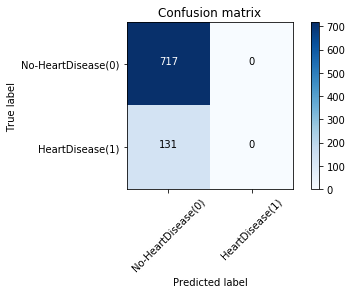

In [108]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Pred_SVM, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, Pred_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No-HeartDisease(0)','HeartDisease(1)'], normalize= False,  title='Confusion matrix')

In [109]:
y_train.sum()

513

### Desicion Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
ModelDTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10).fit(x_train, y_train)
pred_DTree = ModelDTree.predict(x_test)
print("Avg F1-score: %.4f" % f1_score(y_test, pred_DTree, average='weighted', labels=np.unique(pred_DTree)))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, pred_DTree))

Avg F1-score: 0.7869
Jaccard score: 0.8219


### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

ModelLR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
pred_LR = ModelLR.predict(x_test)

In [113]:
print("Avg F1-score: %.4f" % f1_score(y_test, pred_LR, average='weighted', labels=np.unique(pred_LR)))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, pred_LR))

Avg F1-score: 0.7913
Jaccard score: 0.8526


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       717
           1       1.00      0.05      0.09       131

   micro avg       0.85      0.85      0.85       848
   macro avg       0.93      0.52      0.50       848
weighted avg       0.87      0.85      0.79       848

Confusion matrix, without normalization
[[717   0]
 [125   6]]


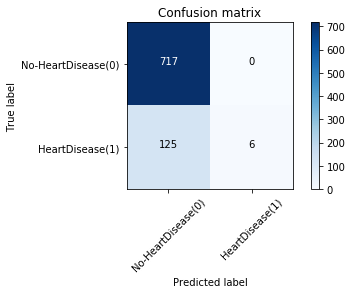

In [114]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_LR, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_LR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No-HeartDisease(0)','HeartDisease(1)'],normalize= False,  title='Confusion matrix')